# Where is the international space station?

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install plotly

In [3]:
import plotly.express as px
import plotly.graph_objects

In [4]:
# Taken from http://open-notify.org/Open-Notify-API/People-In-Space/
url = "http://api.open-notify.org/iss-now.json"

In [5]:
df = pd.read_json(url)

In [6]:
df

,timestamp,message,iss_position
latitude,2021-10-06 03:28:10,success,40.8802
longitude,2021-10-06 03:28:10,success,130.3004


In [7]:
df["latitude"]= df.loc["latitude", "iss_position"]
df["longitude"] = df.loc["longitude", "iss_position"]
df = df.reset_index(drop=True)

In [8]:
df

,timestamp,message,iss_position,latitude,longitude
0,2021-10-06 03:28:10,success,40.8802,40.8802,130.3004
1,2021-10-06 03:28:10,success,130.3004,40.8802,130.3004


In [9]:
df = df.drop(["message", "iss_position"], axis=1)

In [10]:
df

,timestamp,latitude,longitude
0,2021-10-06 03:28:10,40.8802,130.3004
1,2021-10-06 03:28:10,40.8802,130.3004


In [11]:
df = df.head(1)

In [12]:
df

,timestamp,latitude,longitude
0,2021-10-06 03:28:10,40.8802,130.3004


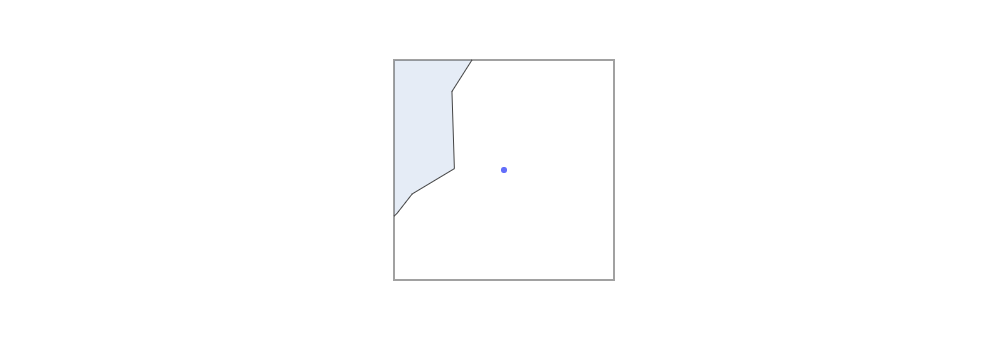

In [22]:
fig = px.scatter_geo(df, lat='latitude', lon='longitude')
fig.update_geos(projection_type="orthographic",fitbounds="locations",projection_scale=9999999999999999)
fig.show()